In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from  sklearn.metrics  import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#loading titanic dataset
df = pd.read_csv("titanic.csv")

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
#dropping unnecessary values such as PassengerID, Name and Ticket
drop_elements = ['PassengerId', 'Name', 'Ticket']
df = df.drop(drop_elements, axis = 1)

In [51]:
#checking null values in the dataset
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [52]:
#filling age and embarked null values
cols = ['Pclass', 'Sex']
age_class_sex = df.groupby(cols)['Age'].mean().reset_index()
df['Age'] = df['Age'].fillna(df[cols].reset_index().merge(age_class_sex, how='left', on=cols).set_index('index')['Age'])

df['Embarked'] = df['Embarked'].fillna('S')

In [53]:
#converting data attributes into categorial numerical form
df['Cabin'] = df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)  
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)

df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4;
df['Age'] = df['Age'].astype(int)

In [54]:
#final cleaned dataset
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,1,1,0,0,0,0
1,1,1,0,2,1,0,3,1,1
2,1,3,0,1,0,0,1,0,0
3,1,1,0,2,1,0,3,1,0
4,0,3,1,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,1,0,0
887,1,1,0,1,0,0,2,1,0
888,0,3,0,1,1,2,2,0,0
889,1,1,1,1,0,0,2,1,1


In [55]:
y = df['Survived']
x = df.drop(['Survived'], axis=1).values
x_features = df.iloc[:,1:]

In [57]:
#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [63]:
#train the decision tree classifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
#predicting the y values from the test data
y_pred = dt.predict(x_test)

In [65]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.7661016949152543


In [67]:
#comparision of Actual and Predicted values
res = pd.DataFrame(list(zip(y_test, y_pred)), columns =['Actual', 'Predicted']) 
res.head(100)

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,1
4,1,1
...,...,...
95,0,1
96,0,0
97,1,1
98,0,0


array([[154,  20],
       [ 49,  72]])

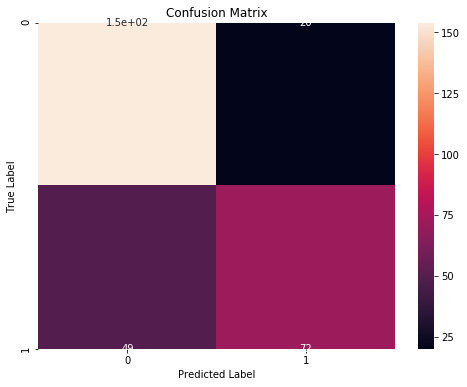

In [66]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
conf_matrix

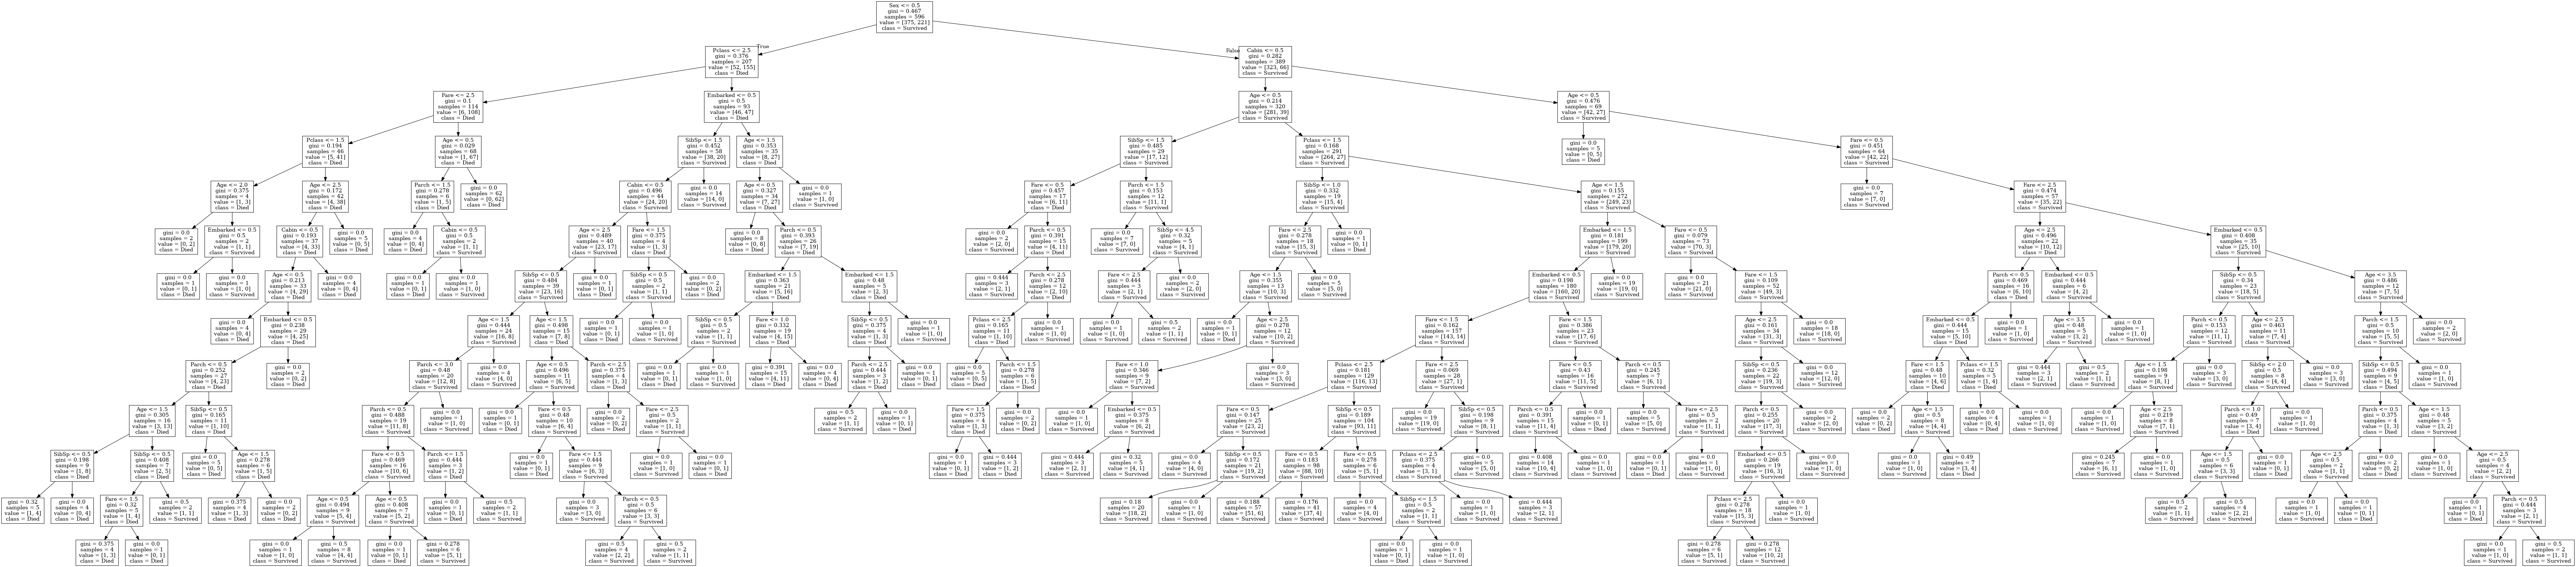

In [68]:
export_graphviz(dt,out_file="data.dot",feature_names=x_features.columns,class_names=["Survived","Died"])
!dot -Tpng data.dot -o tree1.png
Image("tree1.png")